 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [900]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [901]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_df = pd.read_csv(whale_returns_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
whale_returns_df.sort_index(ascending = True, inplace = True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [902]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [903]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df.dropna(inplace = True)
# Checking number of nulls again
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [904]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_returns_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
algo_returns_df.sort_index(ascending = True, inplace = True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [905]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [906]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df.dropna(inplace = True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [907]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
sp500_history_df.sort_index(ascending = True, inplace = True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [908]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.dtypes

Close    object
dtype: object

In [909]:
# Fix Data Types
# YOUR CODE HERE
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "").astype("float")
sp500_history_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [910]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_dailyreturns = sp500_history_df.pct_change()
sp500_dailyreturns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [911]:
# Drop nulls
# YOUR CODE HERE
sp500_dailyreturns.dropna(inplace = True)
sp500_dailyreturns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [912]:
# Rename Column
# YOUR CODE HERE
sp500_dailyreturns.rename(columns = {"Close":"Daily Return: SP500"}, inplace = True)
sp500_dailyreturns.head()

,Daily Return: SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [913]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
returns_data = pd.concat([whale_returns_df, algo_returns_df, sp500_dailyreturns], axis = "columns", join = "inner")
returns_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Return: SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

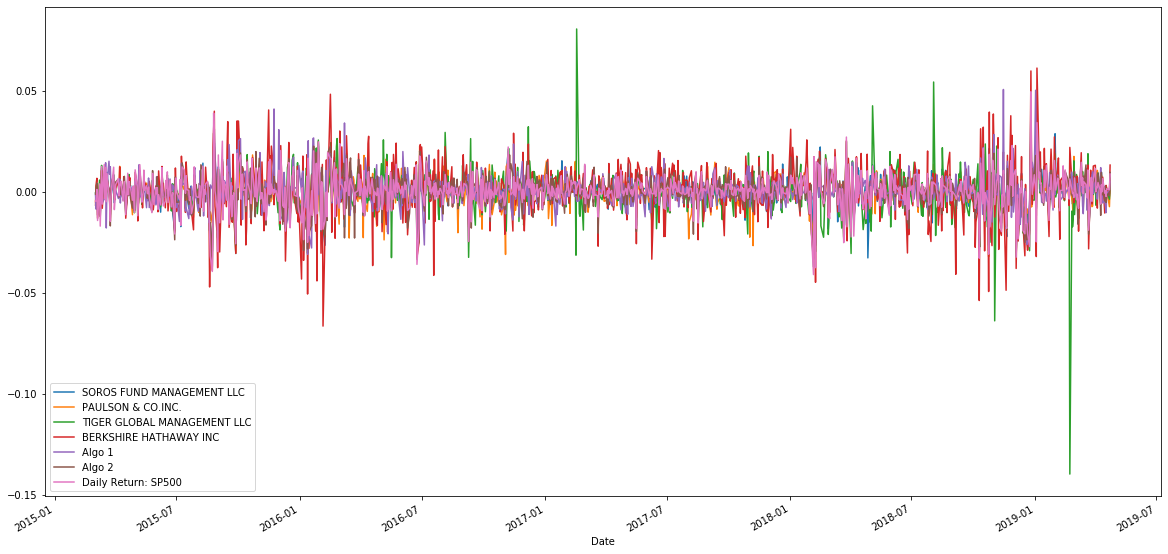

In [914]:
# Plot daily returns
# YOUR CODE HERE
returns_data.plot(figsize = (20,10))

Based on this plot, the following portfolios outperform the S&P 500: Algo1 and Berkshire Hathaway


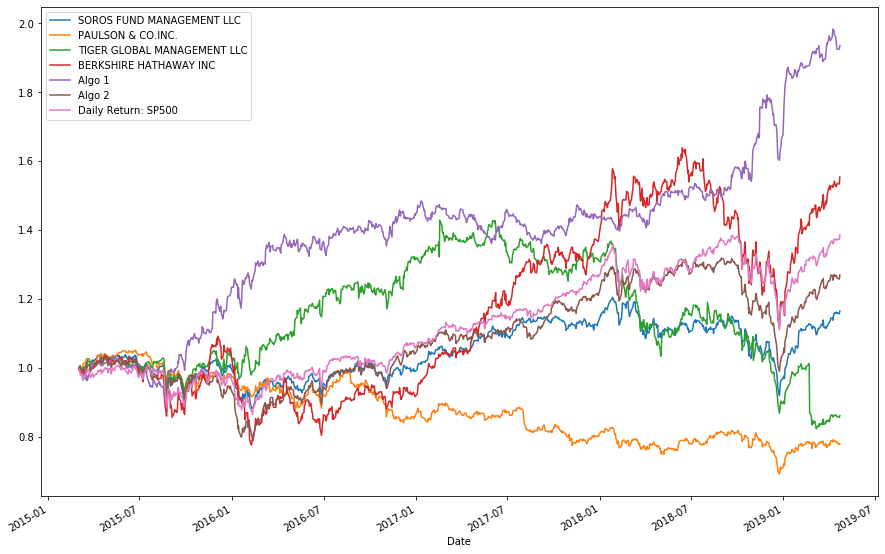

In [915]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + returns_data).cumprod()
cumulative_returns.plot(figsize = (15,10))
print("Based on this plot, the following portfolios outperform the S&P 500: Algo1 and Berkshire Hathaway")

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

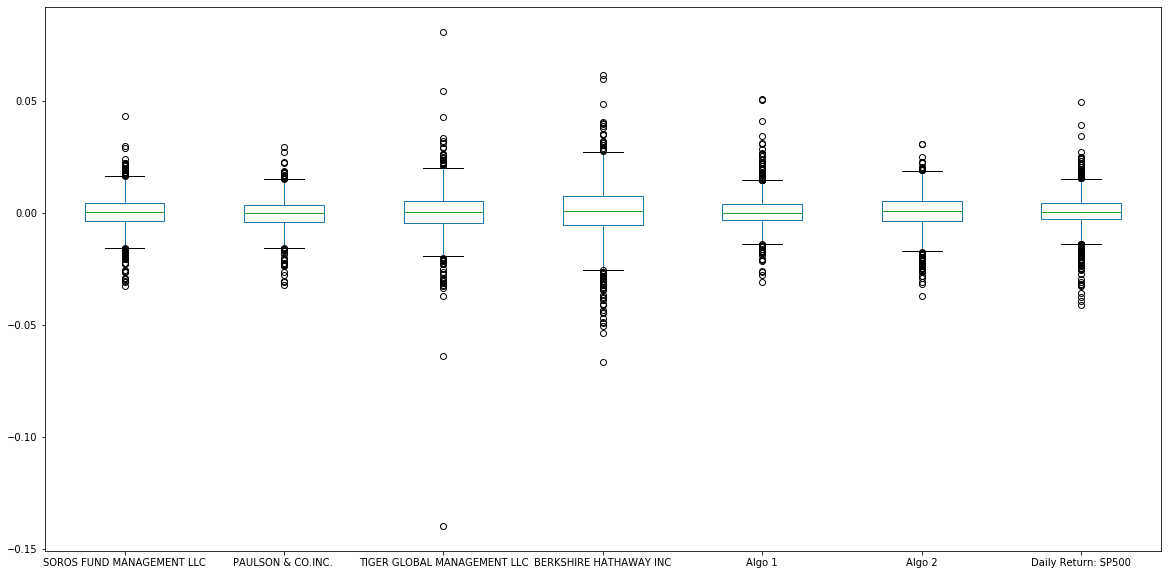

In [916]:
# Box plot to visually show risk
# YOUR CODE HERE
returns_data.plot.box(figsize = (20,10))

In [917]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = returns_data.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
Daily Return: SP500            0.008554
dtype: float64

In [918]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
daily_std = daily_std.sort_values(ascending=False)
print(daily_std)
print("The portfolios that are riskier than the S&P 500 are Berkshire Hathway and Tiger Global Management LLC")

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
Daily Return: SP500            0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64
The portfolios that are riskier than the S&P 500 are Berkshire Hathway and Tiger Global Management LLC


In [919]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
Daily Return: SP500            0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
Yes
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
Algo 2 and Soros fund
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
Yes
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

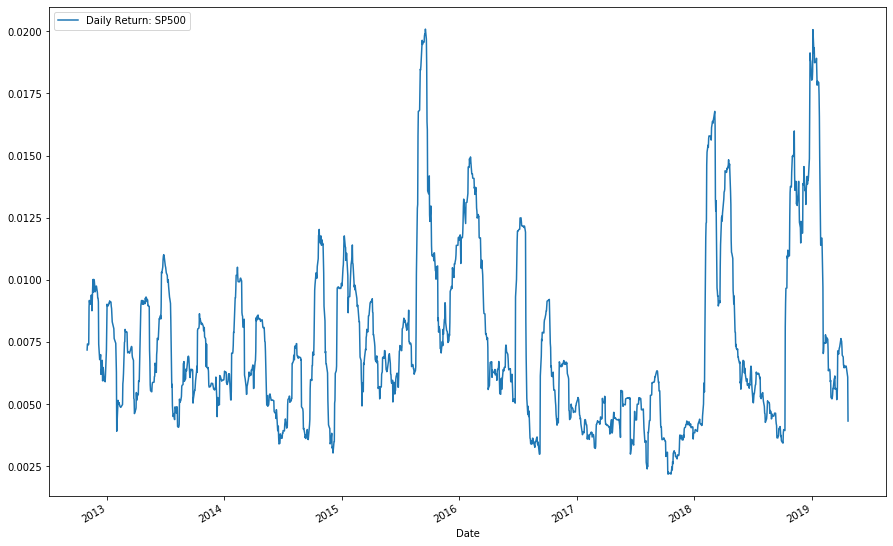

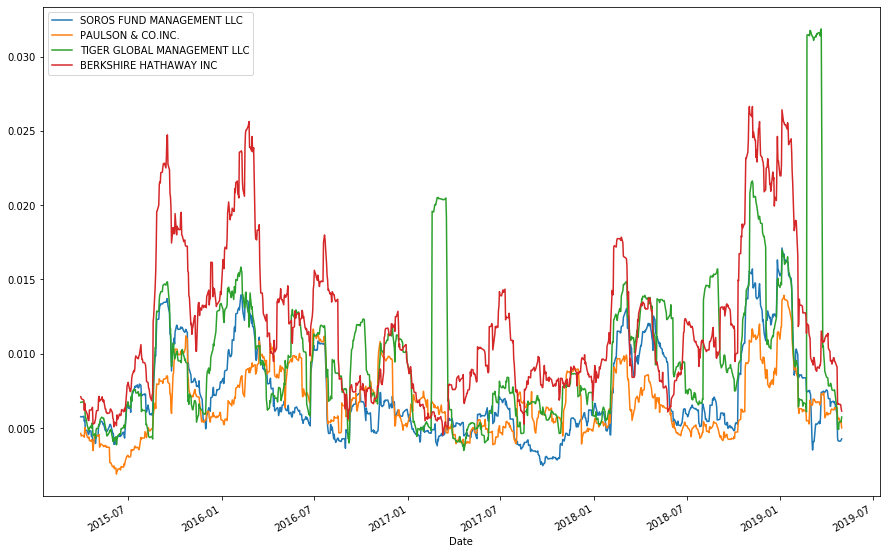

In [920]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
sp500_dailyreturns.rolling(window=21).std().plot(figsize = (15,10))
whale_returns_df.rolling(window=21).std().plot(figsize = (15,10))

In [921]:
# Construct a correlation table
# YOUR CODE HERE
correlation_returns = returns_data.corr()
correlation_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Return: SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
Daily Return: SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


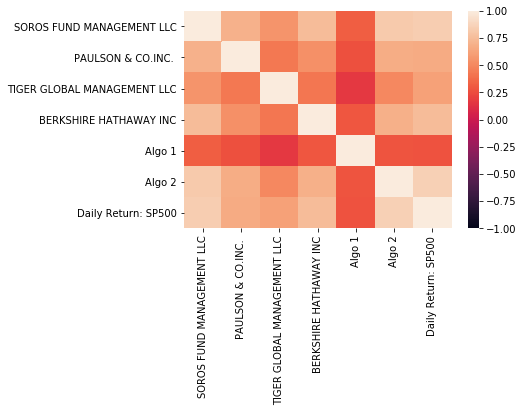

In [922]:
# Heatmap to visualize correlation
sns.heatmap(correlation_returns, vmin=-1, vmax=1)

In [923]:
# Rolling 60 day Covariance of all daily returns of Berkshire Hathaway vs. S&P 500
covariance = returns_data['BERKSHIRE HATHAWAY INC'].rolling(window = 60).cov(returns_data['Daily Return: SP500'])
covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000055
2019-04-17    0.000049
2019-04-18    0.000049
2019-04-22    0.000049
2019-04-23    0.000048
Length: 1043, dtype: float64

In [924]:
# Variance of all daily returns of Berkshire Hathaway vs. S&P 500
variance = returns_data['Daily Return: SP500'].rolling(window = 60).var()
variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: Daily Return: SP500, Length: 1043, dtype: float64

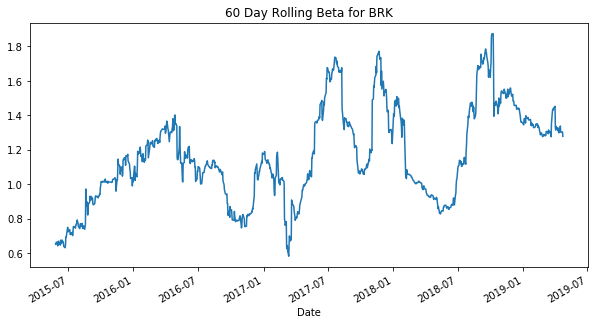

In [925]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
brk_beta = covariance / variance
brk_beta.plot(figsize = (10,5), title = "60 Day Rolling Beta for BRK")

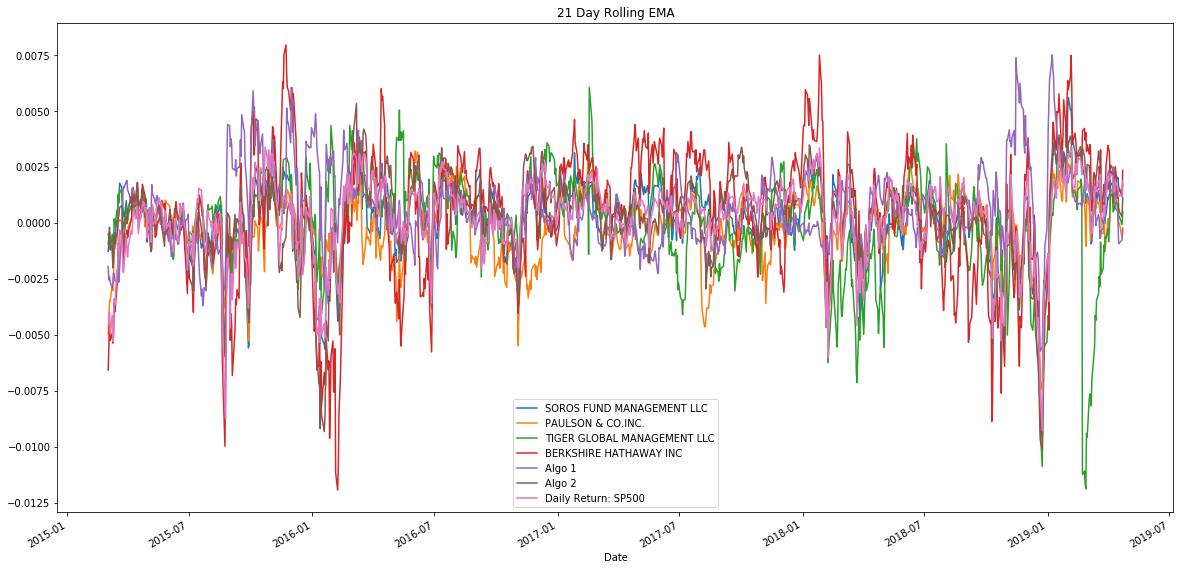

In [926]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
returns_ewm = returns_data.ewm(span = 21, adjust = False).mean()
returns_ewm.plot(figsize = (20,10), title = "21 Day Rolling EMA")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [927]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (returns_data.mean() * 252) / (returns_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
Daily Return: SP500            0.648267
dtype: float64

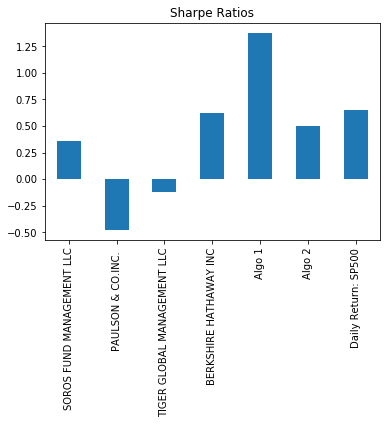

In [928]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: Algo 1 definitely outperforms the market and the whale portfolios.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [929]:
# Read the first stock
# YOUR CODE HERE
amzn_df = pd.read_csv(Path("Resources/AMZN_google_finance.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)
amzn_df.rename(columns = {"Close":"AMZN"}, inplace = True)
amzn_df.head()

,AMZN
Date,
2019-01-02,1539.13
2019-01-03,1500.28
2019-01-04,1575.39
2019-01-07,1629.51
2019-01-08,1656.58


In [930]:
# Read the second stock
# YOUR CODE HERE
msft_df = pd.read_csv(Path("Resources/MSFT_google_finance.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)
msft_df.rename(columns = {"Close":"MSFT"}, inplace = True)
msft_df.head()

,MSFT
Date,
2019-01-02,101.12
2019-01-03,97.40
2019-01-04,101.93
2019-01-07,102.06
2019-01-08,102.80


In [931]:
# Read the third stock
# YOUR CODE HERE
nflx_df = pd.read_csv(Path("Resources/NFLX_google_finance.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)
nflx_df.rename(columns = {"Close":"NFLX"}, inplace = True)
nflx_df.head()

,NFLX
Date,
2019-01-02,267.66
2019-01-03,271.20
2019-01-04,297.57
2019-01-07,315.34
2019-01-08,320.27


In [932]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
all_stocks_df = pd.concat((amzn_df, nflx_df, msft_history), axis = 1, join= "inner")
all_stocks_df.sort_index(ascending = True, inplace = True)
all_stocks_df.head()

,AMZN,NFLX,MSFT
Date,,,
2019-01-02,1539.13,267.66,101.12
2019-01-03,1500.28,271.20,97.40
2019-01-04,1575.39,297.57,101.93
2019-01-07,1629.51,315.34,102.06
2019-01-08,1656.58,320.27,102.80


In [952]:
# Reset the index
# YOUR CODE HERE
all_stocks_df.index = all_stocks_df.index.normalize()
all_stocks_df

,AMZN,NFLX,MSFT
Date,,,
2019-01-02,1539.13,267.66,101.12
2019-01-03,1500.28,271.20,97.40
2019-01-04,1575.39,297.57,101.93
2019-01-07,1629.51,315.34,102.06
2019-01-08,1656.58,320.27,102.80
...,...,...,...
2020-06-29,2680.38,447.24,198.44
2020-06-30,2758.82,455.04,203.51
2020-07-01,2878.70,485.64,204.70


In [934]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
# Redundant

In [951]:
# Drop Nulls
# YOUR CODE HERE
all_stocks_df.dropna(inplace=True)
all_stocks_df

,AMZN,NFLX,MSFT
Date,,,
2019-01-02,1539.13,267.66,101.12
2019-01-03,1500.28,271.20,97.40
2019-01-04,1575.39,297.57,101.93
2019-01-07,1629.51,315.34,102.06
2019-01-08,1656.58,320.27,102.80
...,...,...,...
2020-06-29,2680.38,447.24,198.44
2020-06-30,2758.82,455.04,203.51
2020-07-01,2878.70,485.64,204.70


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [936]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
hero_portfolio = all_stocks_df.dot(weights)
hero_portfolio_returns = hero_portfolio.pct_change()
hero_portfolio_returns.dropna(inplace = True)
hero_portfolio_returns.head()

Date
2019-01-03   -0.020457
2019-01-04    0.056724
2019-01-07    0.036468
2019-01-08    0.015995
2019-01-09    0.001923
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [937]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
all_fund_returns = pd.concat((hero_portfolio_returns,returns_data), axis = 1, join = "inner")
all_fund_returns.rename(columns = {0:"Hero Portfolio"}, inplace = True)
all_fund_returns

,Hero Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Return: SP500
Date,,,,,,,,
2019-01-03,-0.020457,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.024757
2019-01-04,0.056724,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.034336
2019-01-07,0.036468,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.007010
2019-01-08,0.015995,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.009695
2019-01-09,0.001923,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.004098
...,...,...,...,...,...,...,...,...
2019-04-16,0.012303,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.000828,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001743,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [938]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
all_fund_returns.dropna(inplace=True)
all_fund_returns

,Hero Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Return: SP500
Date,,,,,,,,
2019-01-03,-0.020457,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.024757
2019-01-04,0.056724,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.034336
2019-01-07,0.036468,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.007010
2019-01-08,0.015995,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.009695
2019-01-09,0.001923,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.004098
...,...,...,...,...,...,...,...,...
2019-04-16,0.012303,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.000828,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001743,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [939]:
# Risk
# YOUR CODE HERE
all_fund_std = all_fund_returns.std()
all_fund_std

Hero Portfolio                 0.016790
SOROS FUND MANAGEMENT LLC      0.007471
PAULSON & CO.INC.              0.006958
TIGER GLOBAL MANAGEMENT LLC    0.018262
BERKSHIRE HATHAWAY INC         0.012868
Algo 1                         0.005730
Algo 2                         0.007657
Daily Return: SP500            0.007886
dtype: float64

In [940]:
# Rolling
# YOUR CODE HERE
all_fund_returns.rolling(window=21).std().plot(figsize = (15,10))

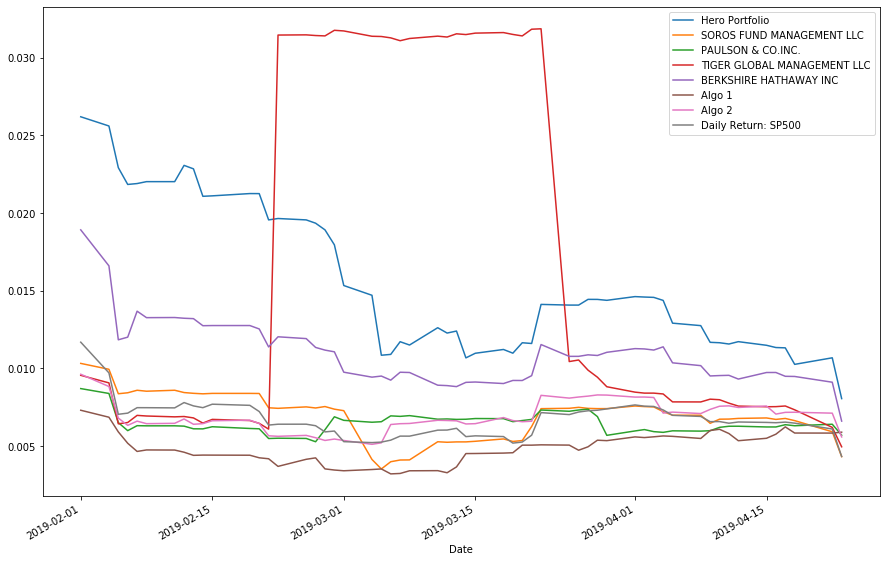

In [940]:
print("According standard deviation analysis, my portfolio demonstrates higher volatility than almost all other fundsduring the 21 day window")

In [941]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
all_sharpe_ratios = (all_fund_returns.mean() * 252) / (all_fund_returns.std() * np.sqrt(252))
all_sharpe_ratios

Hero Portfolio                 3.150423
SOROS FUND MANAGEMENT LLC      4.998934
PAULSON & CO.INC.              2.364248
TIGER GLOBAL MANAGEMENT LLC   -0.384135
BERKSHIRE HATHAWAY INC         4.442098
Algo 1                         3.488488
Algo 2                         5.051608
Daily Return: SP500            4.196678
dtype: float64

In [950]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
all_sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

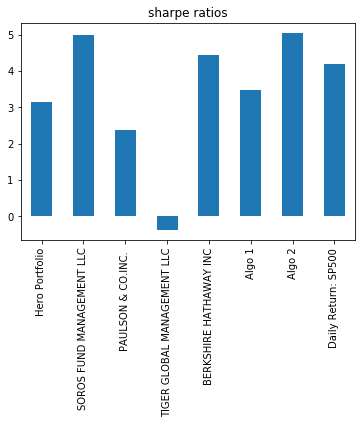

In [950]:
print("According to sharpe ratio analysis, my portfolio has a lower sharpe ratio than most of the other funds.")

In [943]:
# Create a correlation analysis
# YOUR CODE HERE
all_fund_correlation = all_fund_returns.corr()
all_fund_correlation

In [943]:
print("According to the correlation analysis, my portfolio is most correlated with Berkshire Hathaway and the S & P 500, however, this is a rather weak correlation")

,Hero Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Return: SP500
Hero Portfolio,1.000000,0.596652,0.530581,0.195312,0.746931,0.172871,0.718175,0.749192
SOROS FUND MANAGEMENT LLC,0.596652,1.000000,0.749951,0.356923,0.741391,0.091970,0.807262,0.789750
PAULSON & CO.INC.,0.530581,0.749951,1.000000,0.268720,0.618347,0.147312,0.737247,0.699920
TIGER GLOBAL MANAGEMENT LLC,0.195312,0.356923,0.268720,1.000000,0.135657,0.022687,0.198111,0.248452
BERKSHIRE HATHAWAY INC,0.746931,0.741391,0.618347,0.135657,1.000000,0.166761,0.779560,0.872547
Algo 1,0.172871,0.091970,0.147312,0.022687,0.166761,1.000000,0.118447,0.125966
Algo 2,0.718175,0.807262,0.737247,0.198111,0.779560,0.118447,1.000000,0.877848
Daily Return: SP500,0.749192,0.789750,0.699920,0.248452,0.872547,0.125966,0.877848,1.000000


In [949]:
# Beta
# YOUR CODE HERE
# Rolling 60 day Covariance of all daily returns of Hero Portfolio vs. S&P 500
hero_covariance = all_fund_returns['Hero Portfolio'].rolling(window = 60).cov(all_fund_returns['Daily Return: SP500'])
hero_covariance

Date
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
                ...   
2019-04-16    0.000073
2019-04-17    0.000062
2019-04-18    0.000062
2019-04-22    0.000062
2019-04-23    0.000063
Length: 76, dtype: float64

In [948]:
# Variance of all daily returns of Hero Portfolio vs. S&P 500
hero_variance = all_fund_returns['Daily Return: SP500'].rolling(window = 60).var()
hero_variance

Date
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: Daily Return: SP500, Length: 76, dtype: float64

In [947]:
# Beta of Hero Portfolio
hero_beta = hero_covariance / hero_variance
hero_beta

Date
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
                ...   
2019-04-16    1.759634
2019-04-17    1.669881
2019-04-18    1.669994
2019-04-22    1.666099
2019-04-23    1.678731
Length: 76, dtype: float64

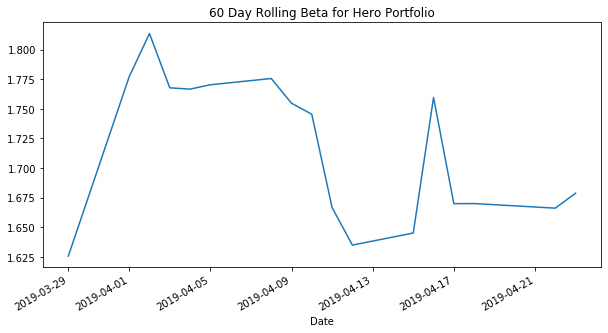

In [946]:
# Plot of 60 day Rolling Beta for Hero Portfolio
hero_beta.plot(figsize = (10,5), title = "60 Day Rolling Beta for Hero Portfolio")

In [ ]:
print("According to the plot above, my portfolio is more volatile than the S & P 500")